### Practical Time Series Analysis & Forecast
The dataset for this quiz is [here](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv)

In this quiz, we will explore and build time series forecasting models for measurements of electricity prices of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

Dataset Description:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

The dataset is sampled on an hourly basis and has the following features:

**Attribute Information:**

- `FullDate`: Date in format yyyy-mm-dd hh:mm:ss
- `ElecPrice`: Prices of electricity charged in Kw per hour
- `GasPrice`: power generated was done via a gas power plant, gas price is the price of gas at time-T
- `SysLoad`: Total Load on system or Power consumed at time-T
- `Tmax`: maximum temperature at time-T

In [ ]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Load the dataset
df = pd.read_csv('Time_series_analysis_and_forecast_dataset.csv')
print(df.shape)
df.head()

(92016, 5)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,9/1/2010 0:00,15.8,1688.215,3.69,23.710
1,9/1/2010 1:00,15.8,1669.195,3.69,22.635
2,9/1/2010 2:00,15.8,1491.980,3.69,22.565
3,9/1/2010 3:00,15.8,1330.760,3.69,18.910
4,9/1/2010 4:00,15.8,1247.940,3.69,18.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
#check for missing values
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [ ]:
# Convert the FullDate column to DateTime object
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.set_index("FullDate")

In [ ]:
# Resampling from "hourly" to "daily" sample rate
daily_df = df.resample('D').sum()
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
print(daily_df.shape)
daily_df.corr()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
ElecPrice,0.004748,0.170524,0.352420,1.000000


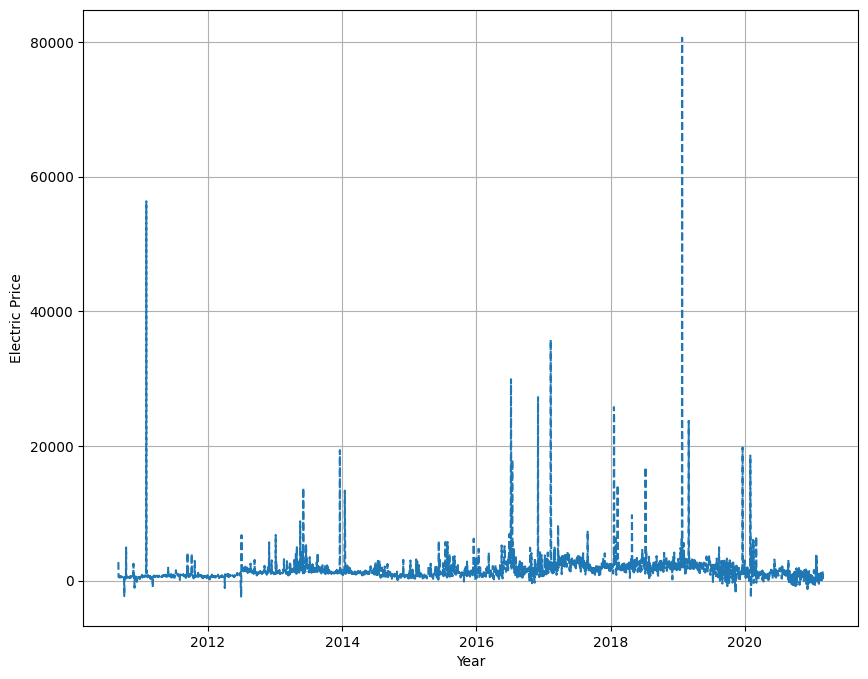

In [ ]:
##Q11.
#plot of the daily global_active_power over time
plt.figure(figsize=(10,8))
plt.plot(daily_df.index, daily_df['ElecPrice'], '--')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price');

##### Q.12: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the `SysLoad` and `GasPrice` of the resampled Data set, to 6 decimal places?

In [ ]:
# Perform ADF test on `SysLoad` and `GasPrice` columns
for col in ['SysLoad', 'GasPrice']:
    result = adfuller(daily_df[col])
    print(f"P-value for {col}: {result[1]:.6f}")

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


##### Q. 13: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of `GasPrice` and `ElecPrice` of the resampled Data set, to 4 decimal places?

In [ ]:
# Perform ADF test on `GasPrice` and `ElecPrice` columns
for col in ['GasPrice', 'ElecPrice']:
    result = adfuller(daily_df[col])
    print(f'Critical values for {col}:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

Critical values for GasPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672
Critical values for ElecPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672


In [ ]:
train = daily_df.iloc[:2757,:]
test = daily_df.iloc[2757:,:]

train.reset_index(inplace = True)
print('train shape:', train.shape)
print('test shape:', test.shape)
train.head()

train shape: (2757, 5)
test shape: (1077, 4)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df_train = train.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
test.reset_index(inplace = True)
test.head()
df_test = test.iloc[:,[0,-1]]
df_test = df_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [ ]:
# !pip install pystan~=2.14
# !pip install prophet

In [ ]:
from prophet import Prophet
uni_model = Prophet()
uni_model.fit(df_train)

forecast_1 = uni_model.predict(df_test)
forecast_1.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/r791y3qf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/kjjpjqz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66551', 'data', 'file=/tmp/tmp8w9seu5r/r791y3qf.json', 'init=/tmp/tmp8w9seu5r/kjjpjqz_.json', 'output', 'file=/tmp/tmp8w9seu5r/prophet_modelgd4o2wzl/prophet_model-20230801210119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:01:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:01:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2682.065843,171.997620,5091.434641,2682.065843,2682.065843,-154.965508,-154.965508,-154.965508,9.732410,9.732410,9.732410,-164.697918,-164.697918,-164.697918,0.0,0.0,0.0,2527.100335
1,2018-03-21,2682.850753,253.547687,5021.940876,2682.850753,2682.850753,-2.503550,-2.503550,-2.503550,159.360588,159.360588,159.360588,-161.864138,-161.864138,-161.864138,0.0,0.0,0.0,2680.347203
2,2018-03-22,2683.635662,493.081100,5177.106889,2683.635662,2683.635662,95.651673,95.651673,95.651673,257.118925,257.118925,257.118925,-161.467252,-161.467252,-161.467252,0.0,0.0,0.0,2779.287335
3,2018-03-23,2684.420572,103.969561,5113.966491,2684.420572,2684.420572,-113.065288,-113.065288,-113.065288,50.276124,50.276124,50.276124,-163.341411,-163.341411,-163.341411,0.0,0.0,0.0,2571.355284
4,2018-03-24,2685.205481,-142.353608,4732.196930,2685.205481,2685.205481,-438.697092,-438.697092,-438.697092,-271.452761,-271.452761,-271.452761,-167.244330,-167.244330,-167.244330,0.0,0.0,0.0,2246.508390


##### Q. 14: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [ ]:
# Define the MAPE function
def metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = metric(df_test['y'], forecast_1['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is: 542.89


##### Q. 15: What is the RMSE in 2 decimal places?

In [ ]:
rmse = np.sqrt(mean_squared_error(df_test['y'], forecast_1['yhat']))
print(f'The Mean Squared Error is: {round(rmse, 2)}')

The Mean Squared Error is: 3204.22


##### Q.16:	If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

**Answer: July**

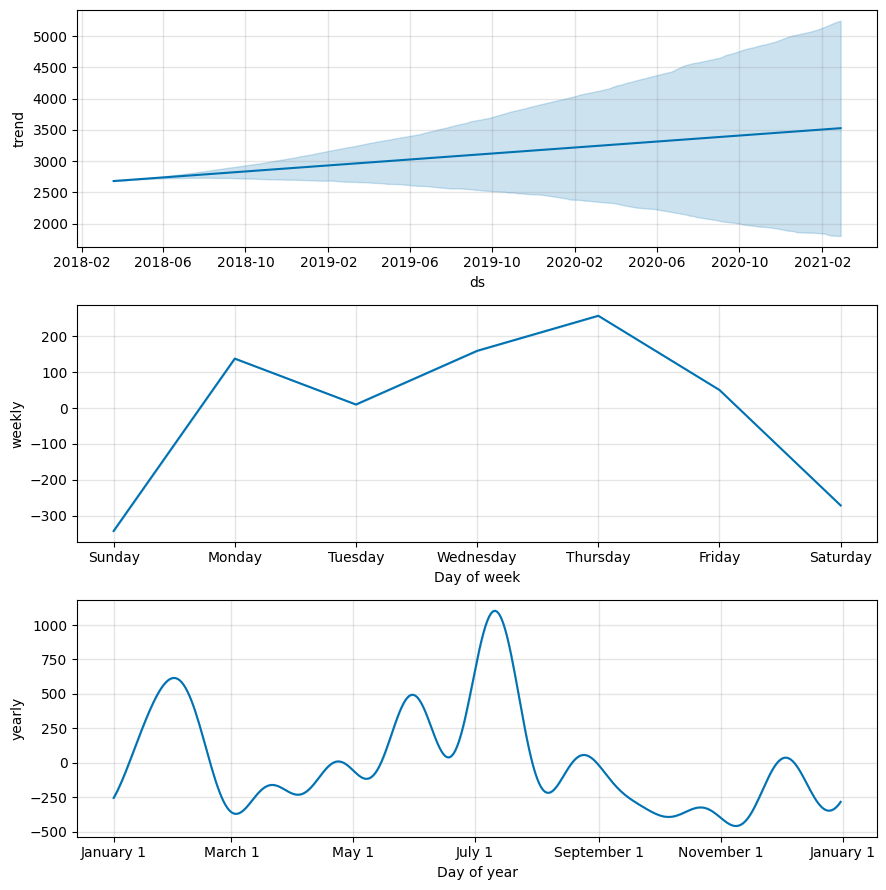

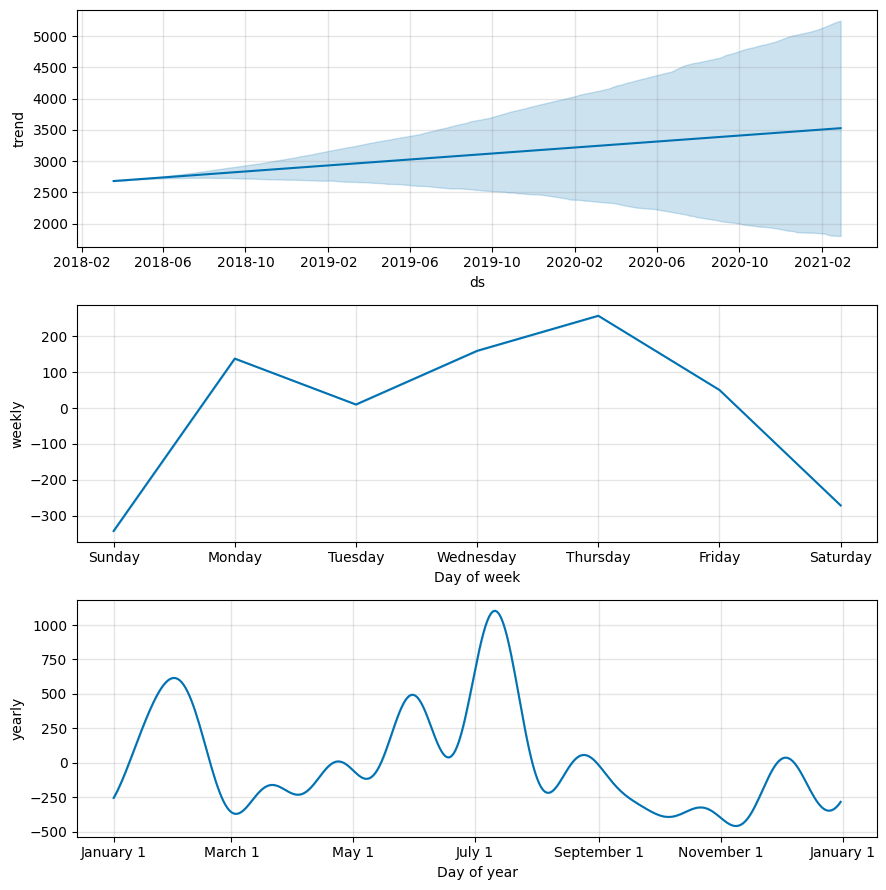

In [ ]:
uni_model.plot_components(forecast_1)

In [ ]:
daily_df.reset_index(inplace=True)
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


#### Train a multivariate time series model

In [ ]:
##Setting the regression and prediction features for training
daily_df1 = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
daily_df1.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
train_1 = daily_df1.iloc[:2757,:]
test_1 = daily_df1.iloc[2757:,:]

multi_model = Prophet()

multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')

In [ ]:
multi_model.fit(train_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/roex1y5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/h01s5p_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44792', 'data', 'file=/tmp/tmp8w9seu5r/roex1y5m.json', 'init=/tmp/tmp8w9seu5r/h01s5p_l.json', 'output', 'file=/tmp/tmp8w9seu5r/prophet_modelg31x9djr/prophet_model-20230801210619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:06:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_2 = multi_model.predict(test_1)
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1873.470075,-364.293332,4213.005023,1873.470075,1873.470075,-856.413924,-856.413924,-856.413924,0.230770,...,-84.501286,-84.501286,-84.501286,-38.750049,-38.750049,-38.750049,0.0,0.0,0.0,1994.667187
1,2018-03-21,1874.178820,-265.038760,4247.960644,1874.178820,1874.178820,-1026.434097,-1026.434097,-1026.434097,0.228032,...,42.448963,42.448963,42.448963,-29.392871,-29.392871,-29.392871,0.0,0.0,0.0,1986.116697
2,2018-03-22,1874.887566,621.262316,5051.624483,1874.887566,1874.887566,-214.967935,-214.967935,-214.967935,0.214765,...,145.588730,145.588730,145.588730,-24.292738,-24.292738,-24.292738,0.0,0.0,0.0,2906.518238
3,2018-03-23,1875.596311,274.416746,4710.601422,1875.596311,1875.596311,-274.908736,-274.908736,-274.908736,0.206973,...,-44.330518,-44.330518,-44.330518,-23.309112,-23.309112,-23.309112,0.0,0.0,0.0,2590.744995
4,2018-03-24,1876.305056,-751.179049,3681.638711,1876.305056,1876.305056,-1076.481421,-1076.481421,-1076.481421,0.205078,...,-117.499920,-117.499920,-117.499920,-26.192027,-26.192027,-26.192027,0.0,0.0,0.0,1443.611697


##### Q. 17: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [ ]:
mape = metric(test_1['y'],forecast_2['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is:236.15


##### Q. 18: What is the RMSE in 2 decimal places?

In [ ]:
rmse = np.sqrt(mean_squared_error(test_1['y'],forecast_2['yhat']))
print(f'The Root Mean Squared Error (RMSE) is: {round(rmse, 2)}')

The Root Mean Squared Error (RMSE) is: 2712.29


##### Q. 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

**Answer: Thursday**

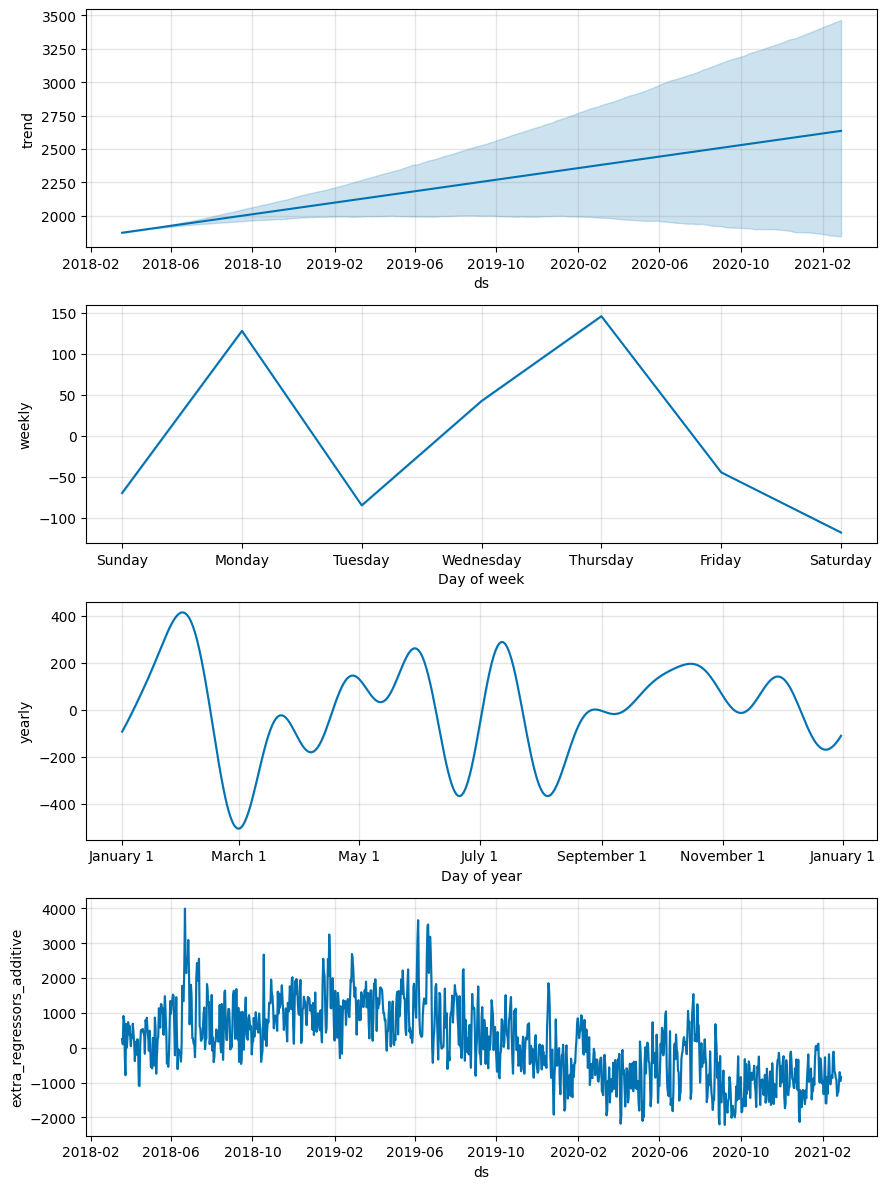

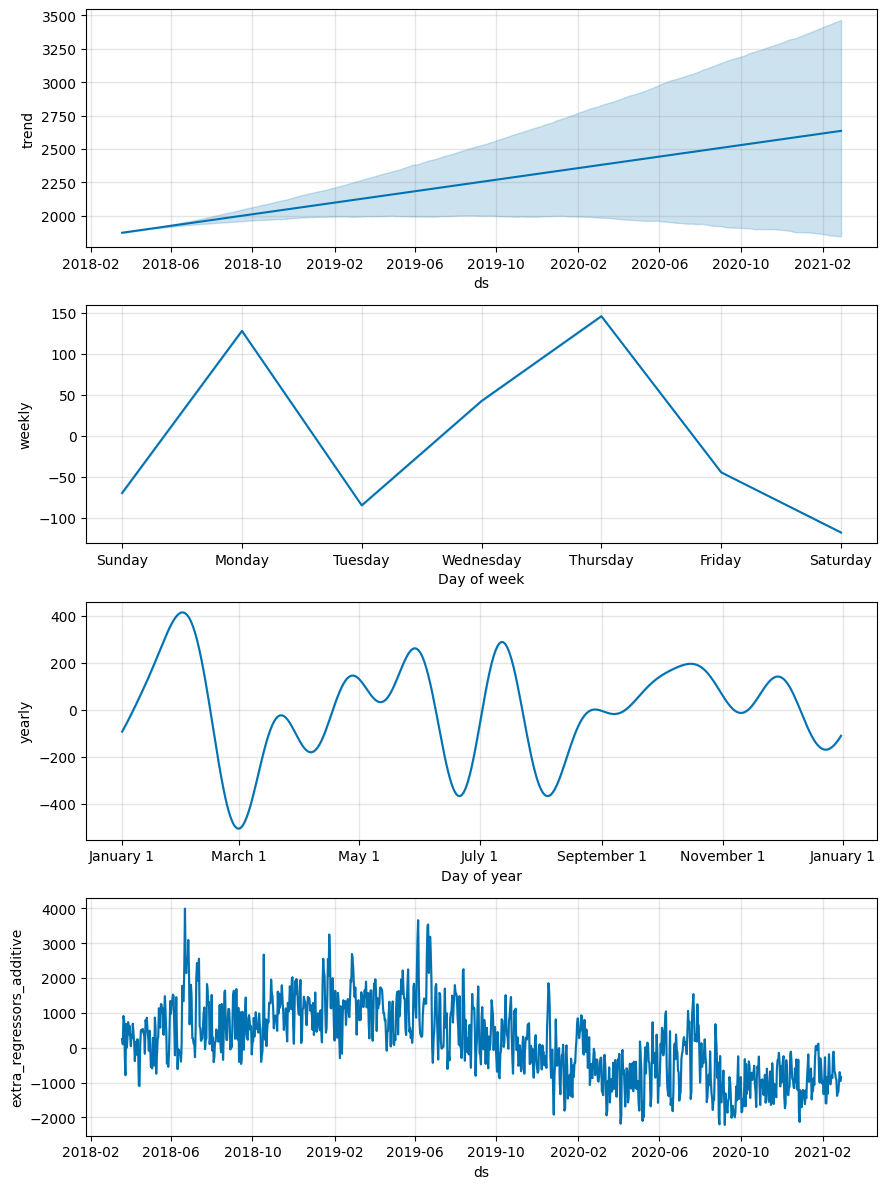

In [ ]:
multi_model.plot_components(forecast_2)

#### Train a multivariate time series model performing the same train test split as before, but now exclude `Tmax` from the training data(drop `Tmax`),

In [ ]:
train_2 = daily_df.iloc[:2757,:]
test_2 = daily_df.iloc[2757:,:]
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
daily_df2 = daily_df.drop(columns=['Tmax'], inplace=True)
daily_df2 = daily_df.rename(columns = {'FullDate':'ds',
                                       'SysLoad':'add1',
                                       'GasPrice':'add3',
                                       'ElecPrice':'y'})
daily_df2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [ ]:
df_train_2 = daily_df2.iloc[:2757,:]
df_test_2 = daily_df2.iloc[2757:,:]

In [ ]:
# Create multivariate model without `Tmax'
multi_model = Prophet()
multi_model.add_regressor('add1')
multi_model.add_regressor('add3')
multi_model.fit(df_train_2)
forecast_3 = multi_model.predict(df_test_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/80vrkqjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8w9seu5r/954nlxvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96413', 'data', 'file=/tmp/tmp8w9seu5r/80vrkqjf.json', 'init=/tmp/tmp8w9seu5r/954nlxvt.json', 'output', 'file=/tmp/tmp8w9seu5r/prophet_model88p2blgi/prophet_model-20230801211640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##### Q. 20: What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [ ]:
mape = metric(df_test_2['y'],forecast_3['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error (MAPE) is:233.56
